## Reading QCM data

The data was provided in `csv` format and converted to `HDF5`. The file has the following structure:

In [1]:
import pandas as pd

pd.read_csv('data/Z-230901A.csv').to_hdf('data/Z-230901A.h5', 'data')
pd.read_hdf('data/Z-230901A.h5', 'data')

,Timestamp (sec),Sensor1 [Sensor thickness] (um),Sensor1 [Fundamental freq] (Hz),Sensor2 [Sensor thickness] (um),Sensor2 [Fundamental freq] (Hz),"Mag3 [Platter,Position] (deg)","Mag3 [Platter,Velocity] (rpm)","Mag3 [PS 1,Voltage] (V)","Mag3 [PS 1,Power] (W)","Mag3 [PS 1,Current] (A)",...,"Mag3 [QCM,S1 mean rate] (um/rot)","Mag3 [QCM,S2 mean rate] (um/rot)","Mag3 [QCM,S1 delta] (um/rot)","Mag3 [QCM,S2 delta] (um/rot)","Mag3 [QCM,S1 signal] (um/rot)","Mag3 [QCM,S2 signal] (um/rot)","Mag3 [QCM,S1 background] (um/rot)","Mag3 [QCM,S2 background] (um/rot)","Mag3 [QCM,S1 cumulative] (um/rot)","Mag3 [QCM,S2 cumulative] (um/rot)"
0,1.693808e+09,0.000553,5.983613e+06,0.000352,5.981554e+06,359.964,0.000000,-0.014454,0.114630,-0.001077,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1.693808e+09,0.000552,5.983613e+06,0.000352,5.981554e+06,359.964,0.000000,-0.015322,0.110588,-0.001143,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,1.693808e+09,0.000552,5.983613e+06,0.000352,5.981554e+06,359.964,0.000000,-0.079433,0.116240,-0.001122,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,1.693808e+09,0.000552,5.983613e+06,0.000352,5.981554e+06,359.964,0.000000,-0.038112,0.105528,-0.001116,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,1.693808e+09,0.000553,5.983613e+06,0.000352,5.981554e+06,359.964,0.000000,-0.048205,0.105627,-0.001158,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559478,1.694368e+09,0.899388,5.958605e+06,0.596977,5.906696e+06,19.386,0.560601,396.634131,220.441622,0.553725,...,-5.958606e+06,-5.906697e+06,9.134512,27.109072,13.641996,41.001526,4.959717,14.864329,15846.419089,47106.55334
559479,1.694368e+09,0.899388,5.958605e+06,0.596978,5.906696e+06,22.779,0.560601,397.080859,220.372162,0.552812,...,-5.958606e+06,-5.906697e+06,9.134512,27.109072,13.641996,41.001526,4.959717,14.864329,15846.419089,47106.55334
559480,1.694368e+09,0.899387,5.958605e+06,0.596978,5.906696e+06,26.163,0.560601,397.570642,220.366970,0.552460,...,-5.958606e+06,-5.906697e+06,9.134512,27.109072,13.641996,41.001526,4.959717,14.864329,15846.419089,47106.55334
559481,1.694368e+09,0.899386,5.958605e+06,0.596979,5.906696e+06,29.547,0.560601,397.901133,220.385337,0.551898,...,-5.958606e+06,-5.906697e+06,9.134512,27.109072,13.641996,41.001526,4.959717,14.864329,15846.419089,47106.55334


`QCMData` takes the sensor read-outs and pre-processes the time-series. Also it automatically converts the units to SI.

In [2]:
from qcm_data import QCMData

print(QCMData.__doc__)

QCM Data extractor and convertor. Read raw QCM sensors read-outs and
    pre-processes the raw time-series.

    Attributes:
        theta : Platten position.
        s1, s2 : Raw 'Sensor1' and 'Sensor2' read-outs.
        s1_bgd, s2_bgd : Background sensor read-outs.
        s1_sgn, s2_sgn : Signal read-outs.
    


The class reads the following sensor read-outs from the file:

In [3]:
import json

print(json.dumps(QCMData.columns, sort_keys=True, indent=4))

{
    "s1": "Sensor1 [Sensor thickness]",
    "s1_bgd": "Mag3 [QCM,S1 background]",
    "s1_sgn": "Mag3 [QCM,S1 signal]",
    "s2": "Sensor2 [Sensor thickness]",
    "s2_bgd": "Mag3 [QCM,S1 background]",
    "s2_sgn": "Mag3 [QCM,S2 signal]",
    "theta": "Mag3 [Platter,Position]"
}


`QCMData` can read `csv` and `HDF5` files with `QCMData.import_csv` and `QCMData.read_hdf` respectively.

In [4]:
from dataclasses import fields

data = QCMData.import_hdf('data/Z-230901A.h5', 'data')
print(data)

QCMData(s1=array([5.52702742e-01, 5.51954238e-01, 5.52453240e-01, ...,
       8.99386883e+02, 8.99386311e+02, 8.99385357e+02]), s2=array([3.52085289e-01, 3.51920584e-01, 3.52002936e-01, ...,
       5.96978378e+02, 5.96978712e+02, 5.96979046e+02]), s1_sgn=array([    0.        ,     0.        ,     0.        , ...,
       13641.99642558, 13641.99642558, 13641.99642558]), s2_sgn=array([    0.        ,     0.        ,     0.        , ...,
       41001.52596552, 41001.52596552, 41001.52596552]), s1_bgd=array([   0.        ,    0.        ,    0.        , ..., 4959.71709645,
       4959.71709645, 4959.71709645]), s2_bgd=array([   0.        ,    0.        ,    0.        , ..., 4959.71709645,
       4959.71709645, 4959.71709645]), theta=array([6.28255699e+00, 6.28255699e+00, 6.28255699e+00, ...,
       1.10044164e+05, 1.10044223e+05, 1.10044282e+05]), dtheta=array([-4.44089210e-16,  0.00000000e+00,  0.00000000e+00, ...,
        5.90619419e-02,  5.90619419e-02,  5.90619419e-02]))


The main function is `QCMData.extract_rotations`. It extracts and sums the signal in a given window `limits` for **each** rotation.

In [5]:
print(getattr(QCMData, "extract_rotations").__doc__)

Integrate signal in a `limits` window for each rotation.

        Args:
            attr : Attribute's name.
            limits : The window bounds (`min`, `max`) in radians.

        Returns:
            Integrated signal.
        


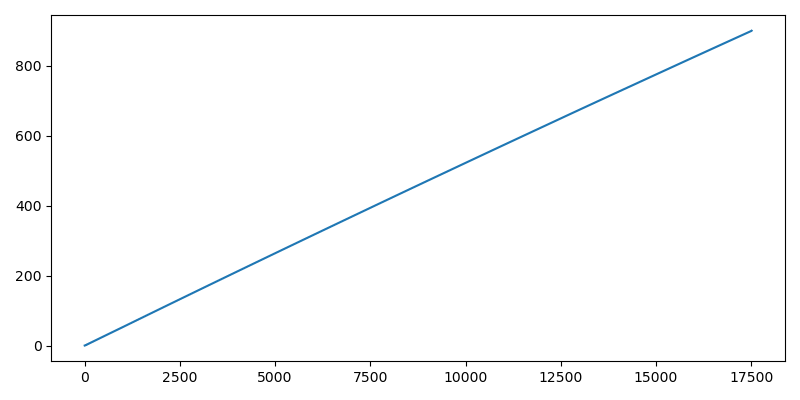

In [6]:
import matplotlib.pyplot as plt
import numpy as np

qcm = data.extract_rotations('s1', limits=(np.deg2rad(270), np.deg2rad(390)))

%matplotlib widget
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(qcm)

fig.tight_layout()
plt.show()

To obtain the processed time-series I'm doing the following:

1. Taking a gradient.
2. Find minima peaks in the gradient - they represent the background level.
3. Find the maxima peaks in the gradient - they represent the real signal, a change of deposited thickness.
3. Finding a period of the signal - distance between maxima.
4. Calculate the signal as a moving average in a period window.

In [7]:
from scipy.ndimage import uniform_filter
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

dqcm = np.diff(qcm)
mins = find_peaks(-dqcm)[0]
bgd = interp1d(mins, dqcm[mins], 'linear', fill_value='extrapolate')(np.arange(dqcm.size))

maxs = find_peaks(dqcm)[0]
maxs = maxs[dqcm[maxs] > 0.8 * (np.max(dqcm) - np.min(dqcm)) + np.min(dqcm)]
period = (maxs[1:] - maxs[:-1]).mean()

sgn = period * uniform_filter(dqcm - bgd, period, mode='nearest')

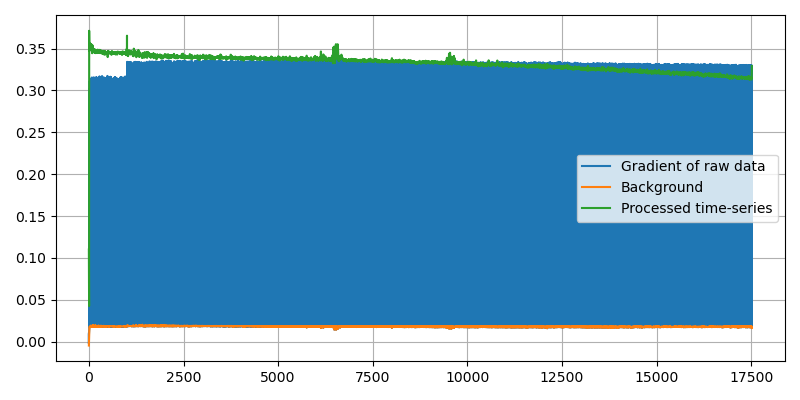

In [26]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(dqcm.size), dqcm, label="Gradient of raw data")
ax.plot(np.arange(bgd.size), bgd, label="Background")
ax.plot(np.arange(sgn.size), sgn, label="Processed time-series")
ax.grid(True)

ax.legend(fontsize=10)
fig.tight_layout()
plt.show()

## Robust Holt-Winters smoothing

Article : https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1089403

The smoothing algorithm updates three parameters at each step of a time-series $y_i$:

1. The smoothed time-series $\hat{y}_i$.
2. The slope (first gradient) at the given time $F_i$.
3. The standard deviation $\sigma_i$.

For each of these parameters there is a decay-rate, that defines over how many past values affect the current estimate. **Higher decay-rate -> less smoothing**:

1. `lambda1` - for the smoothed time-series $\hat{y}_i$.
2. `lambda2` - for the slope $F_i$.
3. `lambda_sigma` - for the standard deviation $\sigma_i$.

In [13]:
from robust_holt_winters import robust_holt_winters

lambda1, lambda2, lambda_sigma = 0.001, 0.001, 0.001

smoother = robust_holt_winters(lambda1=lambda1, lambda2=lambda2,
                               lambda_sigma=lambda_sigma)

A generated `smoother` object have two methods:

1. `smoother.init` - generates an initial state $\{\hat{y_i}, F_i, \sigma_i \}$ from an input time-series `warmup`.
2. `smoother.update` - performs the update of the state $\{\hat{y_i}, F_i, \sigma_i \}$ for a new datapoint $y_i$.

A state `HoldWintersState` is a `NamedTuple` of four attributes:
1. count - current count of update iterations.
2. last - last estimate of the smoothed time-series $\hat{y}_{i}$.
3. moment - last estimate of the slope $F_i$.
4. sigma - last estimate of the standard deviation $\sigma_i$.


In [14]:
from robust_holt_winters import TransformInitFn, TransformUpdateFn

print(TransformInitFn.__call__.__doc__)
print(TransformUpdateFn.__call__.__doc__)

The `init` function.

        Args:
            params: The initial value of the parameters.

        Returns:
            The initial state of the smoothing model.
        
The `update` function.

        Args:
            new: A new element in the time-series.
            state: The state of the smoothing transformation.

        Returns:
            The transformed new element in the time-series and the updated state.
        


In [15]:
from robust_holt_winters import HoldWintersState

help(HoldWintersState)

Help on class HoldWintersState in module robust_holt_winters:

class HoldWintersState(builtins.tuple)
 |  HoldWintersState(count: jax.Array, last: jax.Array, moment: jax.Array, sigma: jax.Array)
 |  
 |  The state of Hold-Winters smoothing algorithm.
 |  
 |  Attributes:
 |      count : Update count.
 |      last : Last estimate of a smoothed time-series.
 |      moment : Last estimate of a slope.
 |      sigma : Last estimate of standard deviation.
 |  
 |  Method resolution order:
 |      HoldWintersState
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getnewargs__(self)
 |      Return self as a plain tuple.  Used by copy and pickle.
 |  
 |  __repr__(self)
 |      Return a nicely formatted representation string
 |  
 |  _asdict(self)
 |      Return a new dict which maps field names to their values.
 |  
 |  _replace(self, /, **kwds)
 |      Return a new HoldWintersState object replacing specified fields with new values
 |  
 |  --------------

Here is an example of a single smoothing update:

In [19]:
# Initialise the state
state = smoother.init(sgn[10:110])

# Update the state
elem, state = smoother.update(sgn[110], state)

# elem is the new estimate of the smoothed time-series
# and identical to state.last

print(elem, state.last)

0.34965068 0.34965068


And here is the example of smoothing the whole data-set:

In [35]:
from tqdm.auto import tqdm

# Starting index and the size of warm-up series
N_start, N_warmup = 150, 200

# Initialise the state
state = smoother.init(sgn[N_start:N_start + N_warmup])

# Smoothe the time-series
smoothed_series = []
for elem in tqdm(sgn[N_start + N_warmup:]):
    new_elem, state = smoother.update(elem, state)
    smoothed_series.append(new_elem)

  0%|          | 0/17163 [00:00<?, ?it/s]

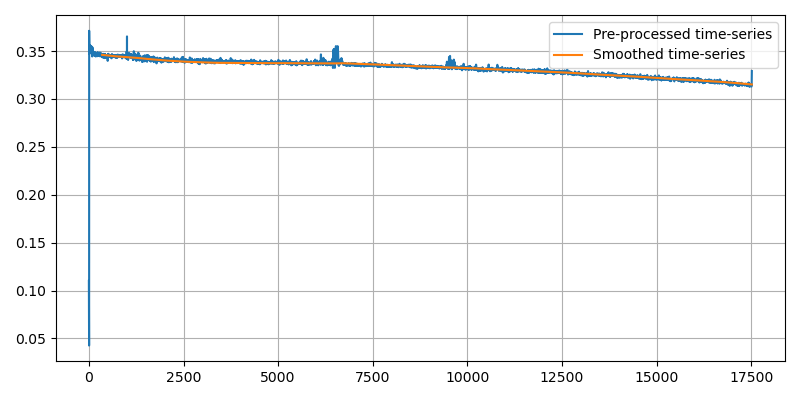

In [39]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(sgn.size), sgn, label="Pre-processed time-series")
ax.plot(np.arange(N_start + N_warmup, sgn.size), smoothed_series,
        label="Smoothed time-series")
ax.grid(True)
ax.legend(fontsize=10)

fig.tight_layout()
plt.show()

## Training procedure

Training yields the most optimal values of `lambda1, lambda2, lambda_sigma` based on a past time-series.

To this aid, meta-learning approach was designed similar to Optax Meta-learning: https://optax.readthedocs.io/en/latest/meta_learning.html

In short, it follows the following steps:

1. An inner loop finds an initial state $\{\hat{y_i}, F_i, \sigma_i \}$ from a warm-up section of size $N_{warmup}$, performs $N_{train}$ updates and yields a forecast error for $N_{test}$ future datapoints.

2. An outer loop updates the hyper-parameters `lambda1, lambda2, lambda_sigma` by finding the gradient of the forecast error relative to the hyperparameters.

At each step of update procedure, a random part $\{y_t, y_{t + N}\}$ is taken out of the whole data-set, where $N = N_{warmup} + N_{train} + N_{test}$.

Here is an example of training based on the obtained signal `sgn`:

In [13]:
from robust_holt_winters import inject_hyperparams, InjectHyperparamsState, Series
import jax.numpy as jnp
import optax as ox
import jax

# Initial values of decay-rates lambda1, lambda2, lambda_sigma
init_decay = 0.001
# Return a wrapped smoother, that is passed to both outer and inner steps.
smoother = inject_hyperparams(robust_holt_winters)(lambda1=init_decay, lambda2=init_decay,
                                                   lambda_sigma=init_decay)
# Create a gradient-based optimisers for the outer loop
opt = ox.inject_hyperparams(ox.adam)(learning_rate=ox.cosine_onecycle_schedule(2000, 3e-3))

# Inner step performs one Robust Holt-Winters update
# and returns a new state and new estimate of smoothed
# time-series
@jax.jit
def inner_step(state, new):
    elem, state = smoother.update(new, state)
    return state, elem

# Perform an inner state and yield the forecast error
# theta - current estimate of hyper-parameters
# state - current state of smoothing algorithm
# train - train time-series for the inner step.
# test - test time-series for the forecast error calculation.
@jax.jit
def loss(theta: jnp.ndarray, state: InjectHyperparamsState, train: Series, test: Series):
    lambda1, lambda2, lambda_sigma = jax.nn.sigmoid(theta)
    state.hyperparams.update(lambda1=lambda1, lambda2=lambda2, lambda_sigma=lambda_sigma)

    state, _ = jax.lax.scan(inner_step, state, train)
    idxs = jnp.arange(1, len(test) + 1)
    offsets = jax.vmap(jnp.multiply, (None, 0))(state.inner_state.moment, idxs)
    predictions = state.inner_state.last + offsets
    loss = ox.huber_loss((test - predictions) / state.inner_state.sigma) * state.inner_state.sigma + state.inner_state.sigma

    return jnp.sum(loss), (theta, state)

# Performs an oute step of updating hyper-parameters
# theta - current estimate of hyper-parameters
# opt_state - current state of gradient-based optimiser
# state - current state of smoothing algorithm
# train - train time-series for the inner step.
# test - test time-series for the forecast error calculation.
@jax.jit
def meta_step(theta: jnp.ndarray, opt_state: ox.OptState, state: InjectHyperparamsState, train: Series, test: Series):
    (value, (theta, state)), grad = jax.value_and_grad(loss, has_aux=True)(theta, state, train, test)

    updates, opt_state = opt.update(grad, opt_state)
    theta = ox.apply_updates(theta, updates)

    return value, theta, opt_state, state

Now, we can performs the training:

In [14]:
# The dataset
series = sgn[100:-100]
# The initial values for hyper-parameters
theta = jnp.full(3, -jnp.log(1 / init_decay - 1))
# The initial state of the gradient-based optimiser
opt_state = opt.init(theta)

# Define the sizes of warm-up, train, and test time-series
# For one iteration of training loop update.
N_warmup, N_train, N_test = 300, 1200, 300
key = jax.random.PRNGKey(42)
criteria, thetas = [], []

for i in tqdm(range(2000)):
    # Generate a random starting index.
    idx = jax.random.randint(key, (1,), N_warmup, series.size - N_train - N_test)[0]
    # Generate an initial state of the smoothing algorithm
    state = smoother.init(series[idx - N_warmup:idx])
    # Perform the update
    crit, theta, opt_state, state = meta_step(theta, opt_state, state, series[idx:idx + N_train],
                                              series[idx + N_train:idx + N_train + N_test])
    criteria.append(crit)
    thetas.append(theta)

  0%|          | 0/2000 [00:00<?, ?it/s]

Here are the results of the training procedure:

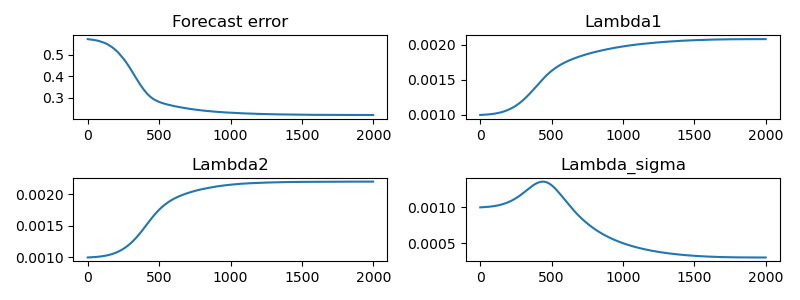

In [16]:
%matplotlib widget
fig, ax = plt.subplots(2, 2, figsize=(8, 3))
ax[0][0].plot(criteria)
ax[0][0].set_title("Forecast error")
ax[0][1].plot(jax.nn.sigmoid(jnp.stack(thetas)[:, 0]))
ax[0][1].set_title("Lambda1")
ax[1][0].plot(jax.nn.sigmoid(jnp.stack(thetas)[:, 1]))
ax[1][0].set_title("Lambda2")
ax[1][1].plot(jax.nn.sigmoid(jnp.stack(thetas)[:, 2]))
ax[1][1].set_title("Lambda_sigma")
fig.tight_layout()
plt.show()